In [3]:

import wradlib as wrl
wrl.__version__

'1.10.3'

In [4]:
import numpy as np
import pandas as pd
from glob import glob
import datetime
from pyproj import Transformer
import matplotlib.pyplot as plt
import wradlib as wrl
import re
import geopandas as gpd
import pygrib

# Data and URLs

In [5]:
DIR_data = 'F:/harmony processed/'

urls_data = np.array(glob(DIR_data + '[0-9]*data*'))
urls_urls = np.array(glob(DIR_data + '[0-9]*urls*'))
urls_shapes = np.array(glob(DIR_data + '[0-9]*shapes*'))

# urls_data_2020 = urls_data[['2020' in i for i in urls_data]]
# urls_urls_2020 = urls_urls[['2020' in i for i in urls_urls]]
# urls_shapes_2020 = urls_shapes[['2020' in i for i in urls_shapes]]

# urls_data = urls_data[[url not in urls_data_2020 for url in urls_data]]
# urls_urls = urls_urls[[url not in urls_urls_2020 for url in urls_urls]]
# urls_shapes = urls_shapes[[url not in urls_shapes_2020 for url in urls_shapes]]

df_file_urls = pd.DataFrame([urls_data,urls_urls,urls_shapes]).T
df_file_urls.columns = ['data','urls','shapes']

df_file_urls.loc[:,'yearmonth'] = df_file_urls.data.str.findall('[0-9][0-9][0-9][0-9][0-9][0-9]').apply(lambda x : x[0])

df_file_urls

,data,urls,shapes,yearmonth
0,F:/harmony processed\201511_data.npy,F:/harmony processed\201511_urls.npy,F:/harmony processed\201511_shapes.npy,201511
1,F:/harmony processed\201512_data.npy,F:/harmony processed\201512_urls.npy,F:/harmony processed\201512_shapes.npy,201512
2,F:/harmony processed\201601_data.npy,F:/harmony processed\201601_urls.npy,F:/harmony processed\201601_shapes.npy,201601
3,F:/harmony processed\201602_data.npy,F:/harmony processed\201602_urls.npy,F:/harmony processed\201602_shapes.npy,201602
4,F:/harmony processed\201603_data.npy,F:/harmony processed\201603_urls.npy,F:/harmony processed\201603_shapes.npy,201603
5,F:/harmony processed\201604_data.npy,F:/harmony processed\201604_urls.npy,F:/harmony processed\201604_shapes.npy,201604
6,F:/harmony processed\201605_data.npy,F:/harmony processed\201605_urls.npy,F:/harmony processed\201605_shapes.npy,201605
7,F:/harmony processed\201606_data.npy,F:/harmony processed\201606_urls.npy,F:/harmony processed\201606_shapes.npy,201606
8,F:/harmony processed\201607_data.npy,F:/harmony processed\201607_urls.npy,F:/harmony processed\201607_shapes.npy,201607
9,F:/harmony processed\201608_data.npy,F:/harmony processed\201608_urls.npy,F:/harmony processed\201608_shapes.npy,201608


In [6]:
df_file_urls.iloc[0,1]

'F:/harmony processed\\201511_urls.npy'

## Raingauge and drainage data

In [7]:
# Drainage and raingauge url
URL_gauge_data = 'C:/Users/sverrirhd/Google Drive/Skóli/DTU/Thesis/Data/Rain gauges/'
URL_gauge_2020_file = URL_gauge_data + 'clean2020data1475.csv'
URL_saved_sensor_data = URL_gauge_data + 'hbs_lysigogn.csv'
DIR_data = 'C:/Users/sverrirhd/vedurgogn/'
DIR_rain_gauges = glob(URL_gauge_data + '*cleaned*')

# Rain gauge metadata
df_sensors = pd.read_csv(URL_saved_sensor_data, sep='\t', encoding='Windows-1252')

# Rain gauges - Review processing of this data before proceeding 
rain_gauage_ids = [re.findall('[0-9][0-9][0-9][0-9]',i)[0] for i in DIR_rain_gauges]
gauges_raw = pd.DataFrame([pd.read_pickle(i) for i in DIR_rain_gauges],index = rain_gauage_ids).T
gauges_raw_hour = gauges_raw.resample('1h').sum().rename(lambda x : str(x) + '_R_raw',axis=1)

# Processed rain gauge data
gauges_clean_long = pd.read_csv(URL_gauge_data + 'yfirfarid_hbs.csv',sep='\t')
gauges_clean_long.TIMI = pd.to_datetime(gauges_clean_long.TIMI)
gauges_clean = gauges_clean_long.pivot_table(values='R',index='TIMI',columns='STOD')
gauges_clean = gauges_clean.rename(lambda x : str(x) + '_R_manual',axis=1)

# All rain gauge data 
gauges = pd.concat([gauges_raw_hour,gauges_clean],axis=1)
first_non_0 = gauges.fillna(0).apply(lambda x : np.argwhere(x.values != 0)[0])
gauges = gauges.apply(lambda x : x.iloc[first_non_0.loc[:,x.name][0]:])  

# Remove rediculous outliers (53 is larges in manual dataset)
gauges[gauges.values > 55]= np.nan

# Drainage flow data
df_target = pd.read_pickle('../Drainage data/all_drainage_data_uncorrected.pkl')
df_target = df_target.drop(['MOS-HOL','KOP-HAB'],axis=1)


## Geo data

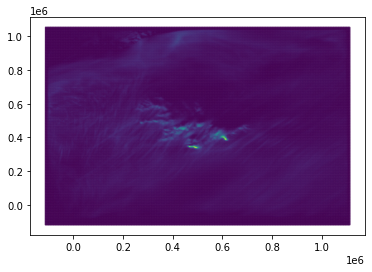

In [8]:
tmp_filename = np.load(df_file_urls.iloc[0,1],allow_pickle=True)[0][40]
transformer_gps_isl = Transformer.from_crs("epsg:4326", "epsg:3057" ) # Umbreyta GPS staðsetningu yfir í cartesian hnit fyrir Ísland
transformer_isl_gps = Transformer.from_crs("epsg:3057", "epsg:4326") # Umbreyta cartesian hnitum aftur í GPS hnit

lons = pygrib.open(tmp_filename).read()[0].longitudes - 360
lats = pygrib.open(tmp_filename).read()[0].latitudes
values = pygrib.open(tmp_filename).read()[0].values
coords = np.array([transformer_gps_isl.transform(b,a) for a,b in zip(lons,lats)])
plt.scatter(coords[:,0],coords[:,1],c = values.ravel(),s = 0.05)

In [9]:
sitecoords = (-22.636, 64.025, 45.0)

postnr = gpd.read_file('../Radar data analysis/Radar visualization/Shapefiles/postnr/postnrs.shp')

transformer_gps_isl = Transformer.from_crs("epsg:4326", "epsg:3057" ) # Umbreyta GPS staðsetningu yfir í cartesian hnit fyrir Ísland
transformer_isl_gps = Transformer.from_crs("epsg:3057", "epsg:4326") # Umbreyta cartesian hnitum aftur í GPS hnit

radar_x,radar_y = transformer_gps_isl.transform(sitecoords[1],sitecoords[0])
gauge_x,gauge_y = transformer_gps_isl.transform(64.1275,-21.902)

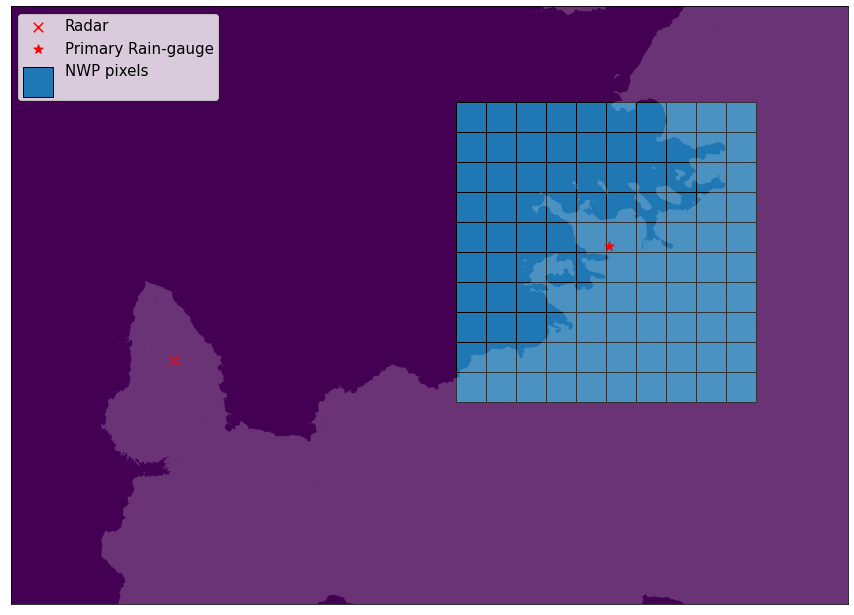

In [10]:
margin = 5

xr,yr = values.shape
NWP_indexes = np.arange(np.product((xr,yr))).reshape((xr,yr))
pixel_distance = ((coords[:,:2] - [gauge_x,gauge_y])**2).sum(axis=1)**0.5
idx_closest_pixel = pixel_distance.argmin()
gauge_idx,gauge_idy = idx_closest_pixel//yr,idx_closest_pixel%yr
NWP_idx = NWP_indexes[gauge_idx-margin:gauge_idx+margin,gauge_idy-margin:gauge_idy+margin].ravel()


plt.figure(figsize=(15,15))
pixels_handle = plt.scatter(coords[NWP_idx,0],coords[NWP_idx,1],s = 900,marker = 's',edgecolors='black')

postnr.geometry.plot(ax = plt.gca(),alpha = 0.2,color='white')

radar_handle = plt.scatter(radar_x,radar_y,c ='red',marker = 'x',s = 90)
gauge_handle = plt.scatter(gauge_x,gauge_y,c ='red',marker = '*',s = 90)

plt.ylim(gauge_y - 30_000,gauge_y + 20_000)
plt.xlim(gauge_x - 50_000,gauge_x + 20_000)
plt.xticks([],[])
plt.yticks([],[])
plt.gca().set_facecolor((0.267004, 0.004874, 0.329415, 1.0))
# plt.title('Data overview - NWP',fontsize=25)
plt.legend([radar_handle,gauge_handle,pixels_handle],['Radar','Primary Rain-gauge','NWP pixels\n'],
           loc = 'upper left',
           fontsize=15,
           borderpad=0.3)
plt.rcParams.update({'legend.labelspacing':0.25})
plt.show()

# save coordinates

In [11]:
np.save('../visualizations/NWP_coords',[coords[NWP_idx,0],coords[NWP_idx,1]],allow_pickle=True)

# Load all NWP data

In [12]:
# load from file if it exists
# NWP_dict = {}
# urls_dict = {}
# shape_dict = {}


def get_newest_file(filename_format,date_format):
    file_names = glob(filename_format + '*')
    file_dates = [datetime.datetime.strptime(url,f'{filename_format}{date_format}.npy') for url in file_names]
    newest_file_name = file_names[np.argmax(file_dates)]
    return  np.load(newest_file_name,allow_pickle=True).item()

filename_format_nwp = f'F:/harmonie model data\\NWP_'
filename_format_urls = f'F:/harmonie model data\\urls_'
filename_format_shapes = f'F:/harmonie model data\\shapes_'
string_format = '%Y%m%d%H%M'
NWP_dict = get_newest_file(filename_format_nwp,string_format)
urls_dict = get_newest_file(filename_format_urls,string_format)
shape_dict = get_newest_file(filename_format_shapes,string_format)

In [16]:
# [i.shape for i in NWP_dict.values()]

## load into dictionaries

In [17]:
df_file_urls_in_series = df_file_urls.urls.apply(lambda x : np.load(x,allow_pickle=True))


In [19]:
# By mistake, some URLS were added twice to the list
np.unique(df_file_urls_in_series.iloc[23].ravel()).shape,df_file_urls_in_series.iloc[23].ravel().shape
np.unique(df_file_urls_in_series.iloc[23].ravel()).shape,df_file_urls_in_series.iloc[23].ravel().shape

((8308,), (16616,))

In [21]:
NWP_idx

array([100428, 100429, 100430, 100431, 100432, 100433, 100434, 100435,
       100436, 100437, 100917, 100918, 100919, 100920, 100921, 100922,
       100923, 100924, 100925, 100926, 101406, 101407, 101408, 101409,
       101410, 101411, 101412, 101413, 101414, 101415, 101895, 101896,
       101897, 101898, 101899, 101900, 101901, 101902, 101903, 101904,
       102384, 102385, 102386, 102387, 102388, 102389, 102390, 102391,
       102392, 102393, 102873, 102874, 102875, 102876, 102877, 102878,
       102879, 102880, 102881, 102882, 103362, 103363, 103364, 103365,
       103366, 103367, 103368, 103369, 103370, 103371, 103851, 103852,
       103853, 103854, 103855, 103856, 103857, 103858, 103859, 103860,
       104340, 104341, 104342, 104343, 104344, 104345, 104346, 104347,
       104348, 104349, 104829, 104830, 104831, 104832, 104833, 104834,
       104835, 104836, 104837, 104838])

In [20]:
# Takes more than 1 minute per month. At least an hour in total
for index,row in df_file_urls.iterrows():
    year_month = row['yearmonth']
    shapes_url = row['shapes']
    NWP_url = row['data']
    urls = row['urls']
    print(year_month)
    if year_month in NWP_dict.keys():
        continue
    
    NWP_flat = np.load(NWP_url).reshape(-1,67,xr*yr)
    NWP_subset = NWP_flat[:,:,NWP_idx]
    shapes = np.load(shapes_url)
    NWP_dict[year_month] = NWP_subset
    urls_dict[year_month] = np.load(urls,allow_pickle=True)
    shape_dict[year_month] = shapes
    
    
    # Save with a datestring at the end to backup data regularly
    DIR_final_data = 'F:/harmonie model data/'
    datestring = datetime.datetime.now().strftime("%Y%m%d%H%M")
    URL_NWP_dict = f'{DIR_final_data}NWP_{datestring}.npy'
    URL_urls_dict = f'{DIR_final_data}urls_{datestring}.npy'
    URL_shape_dict = f'{DIR_final_data}shapes_{datestring}.npy'
    
    # np.save(URL_NWP_dict,NWP_dict)
    # np.save(URL_urls_dict,urls_dict)
    # np.save(URL_shape_dict,shape_dict)

201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201901
201902
201903
201904
201905
201906
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012


In [333]:
# urls_dict.pop('201707')
# NWP_dict.pop('201707')
# shape_dict.pop('201707')

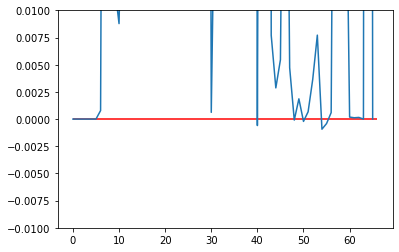

In [445]:
plt.plot(np.diff(NWP_dict['201511'][0][:,0],axis=0).ravel())
plt.hlines(0,0,66,color='red')
plt.ylim(-0.01,0.01)
plt.show()

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.9311905e-05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 6.9618225e-05],
       ...,
       [3.5555115e+00, 4.7944641e+00, 2.9142609e+00, ..., 2.4140778e+00,
        6.1154938e+00, 9.8266754e+00],
       [3.4092255e+00, 4.6685791e+00, 2.8581238e+00, ..., 2.6150208e+00,
        6.8790894e+00, 1.0592392e+01],
       [3.4092255e+00, 4.6685791e+00, 2.8581238e+00, ..., 2.5119171e+00,
        6.7837982e+00, 1.0377457e+01]], dtype=float32)

In [424]:
NWP_dict['201511'][0].shape

(67, 100)

In [412]:
only_valid_cumulative_values = NWP_dict['201511'][0][:shape_dict['201511'][0][0]]
is_less_than_0 = np.diff(only_valid_cumulative_values,axis=0) < 0
np.any(is_less_than_0)

True

In [431]:
np.sum(is_less_than_0),np.sum(~is_less_than_0)

(378, 6222)

In [385]:
NWP_dict

AttributeError: 'dict' object has no attribute 'min'

In [ ]:
precipitation_dict = dict()
for key in NWP_dict:
    precipitation = np.diff(NWP_dict[key],axis=1)
    precipitation_dict[key] = precipitation

In [343]:
timestring_start = len('2015100100.00')
timestring_end = len('.00')
extract_timestring = lambda x : x[-timestring_start:-timestring_end]
extract_timestamp = lambda x : datetime.datetime(int(x[:4]),int(x[4:6]),int(x[6:8]),int(x[8:10]))

forecast_dataframes = []
url_dataframes = {}
for i,(key1,key2,key3) in enumerate(zip(urls_dict,NWP_dict,shape_dict)):
    # print(key1)
    assert key1 == key2 == key3
    urls = urls_dict[key1]
    data = NWP_dict[key2]
    precipitation = np.diff(data,axis=1)
    shape = shape_dict[key3]
        
    # Because they were accidentally appended twice
    if urls.shape[0] == data.shape[0]*2:
        # print('shortened')
        n_urls = urls.shape[0]
        urls = urls[::2]

    # Because the forecast horizons are sometimes varying  
    n = len(urls)
    urls_tmp = np.full((n,67),'',dtype='<U50')

    for i,u in enumerate(urls):
        p = len(u)
        urls_tmp[i,:p] = u
    
    
    df_forecast_urls = pd.DataFrame(urls_tmp)
    df_forecast_data = pd.DataFrame(precipitation.reshape(-1,66*100))
    
    forecast_dates = df_forecast_urls.loc[:,0].apply(lambda x : extract_timestamp(extract_timestring(x)))
    df_forecast_data.index = forecast_dates
    forecast_dataframes.append(df_forecast_data)
    url_dataframes[key1] = df_forecast_urls

In [344]:
df_NWP_combined = pd.concat(forecast_dataframes).sort_index()
df_NWP_combined.to_pickle('df_NWP')

In [261]:
df_forecast_urls.loc[df_forecast_urls.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66


In [254]:
df_NWP_combined.loc[df_NWP_combined.index.duplicated(False)]

,0,1,2,3,4,5,6,7,8,9,...,6690,6691,6692,6693,6694,6695,6696,6697,6698,6699
0,,,,,,,,,,,,,,,,,,,,,
2017-10-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.665226,3.829369,3.524399,3.652760,3.742355,4.527184,5.901276,7.615662,9.113811,9.185314
2017-10-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.821709,1.095093,1.056702,0.872391,0.801743,1.173424,2.495834,3.641617,4.234474,5.865593
2017-10-01 06:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.456161,4.084564,4.022381,4.225410,4.460655,5.173882,6.619808,8.662842,10.688641,10.973988
2017-10-01 06:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.656494,0.599472,0.500717,0.447861,0.465942,0.762192,1.491013,1.766403,2.424286,3.449356
2017-10-01 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.815475,1.377983,0.988953,0.757103,0.484650,0.572411,0.906425,2.063042,2.741547,4.560951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-31 06:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.153027,0.184669,0.163960,0.132893,0.207680,0.509712,0.994686,0.326191,0.221489,0.541927
2017-10-31 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.117527,0.040150,0.045258,0.046719,0.051098,0.039421,0.154026,0.321922,0.572308,0.657719
2017-10-31 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.343040,13.307976,14.741211,16.469032,17.759087,18.464516,21.114502,25.994133,32.960701,38.603424


In [341]:
# urls_dict_copy = urls_dict.copy()
# NWP_dict_copy = NWP_dict.copy()
# shape_dict_copy = shape_dict.copy()

In [247]:
df_NWP_combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7043 entries, 2015-11-01 00:00:00 to 2020-12-31 18:00:00
Columns: 6700 entries, 0 to 6699
dtypes: float32(6700)
memory usage: 180.1 MB


In [117]:
# [NWP_dict[key].shape for key in NWP_dict]

# Visualize some samles to check for quality

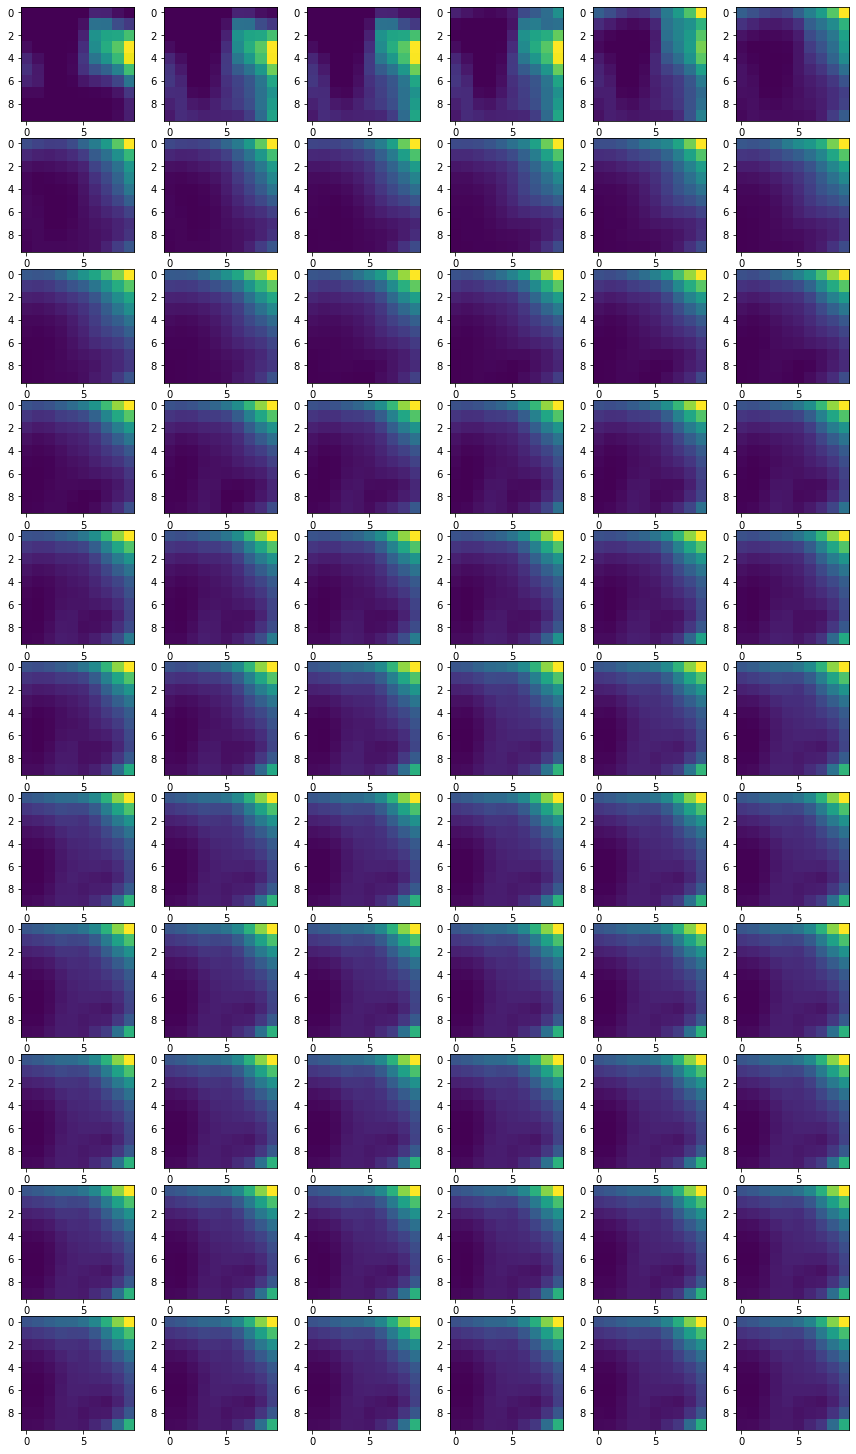

In [62]:
f,axes = plt.subplots(11,6,figsize=(12,20))
for i,ax in enumerate(axes.ravel()):
    ax.imshow(NWP_subset[25][i+1].reshape(10,10))
plt.tight_layout(h_pad=0,pad=0)
plt.show()

# Compute difference between slices for actual precipitation 

In [60]:
precipitation_dict = dict()
for key in NWP_dict:
    precipitation = np.diff(NWP_dict[key],axis=1)
    precipitation_dict[key] = precipitation

## Visualize to check if its working

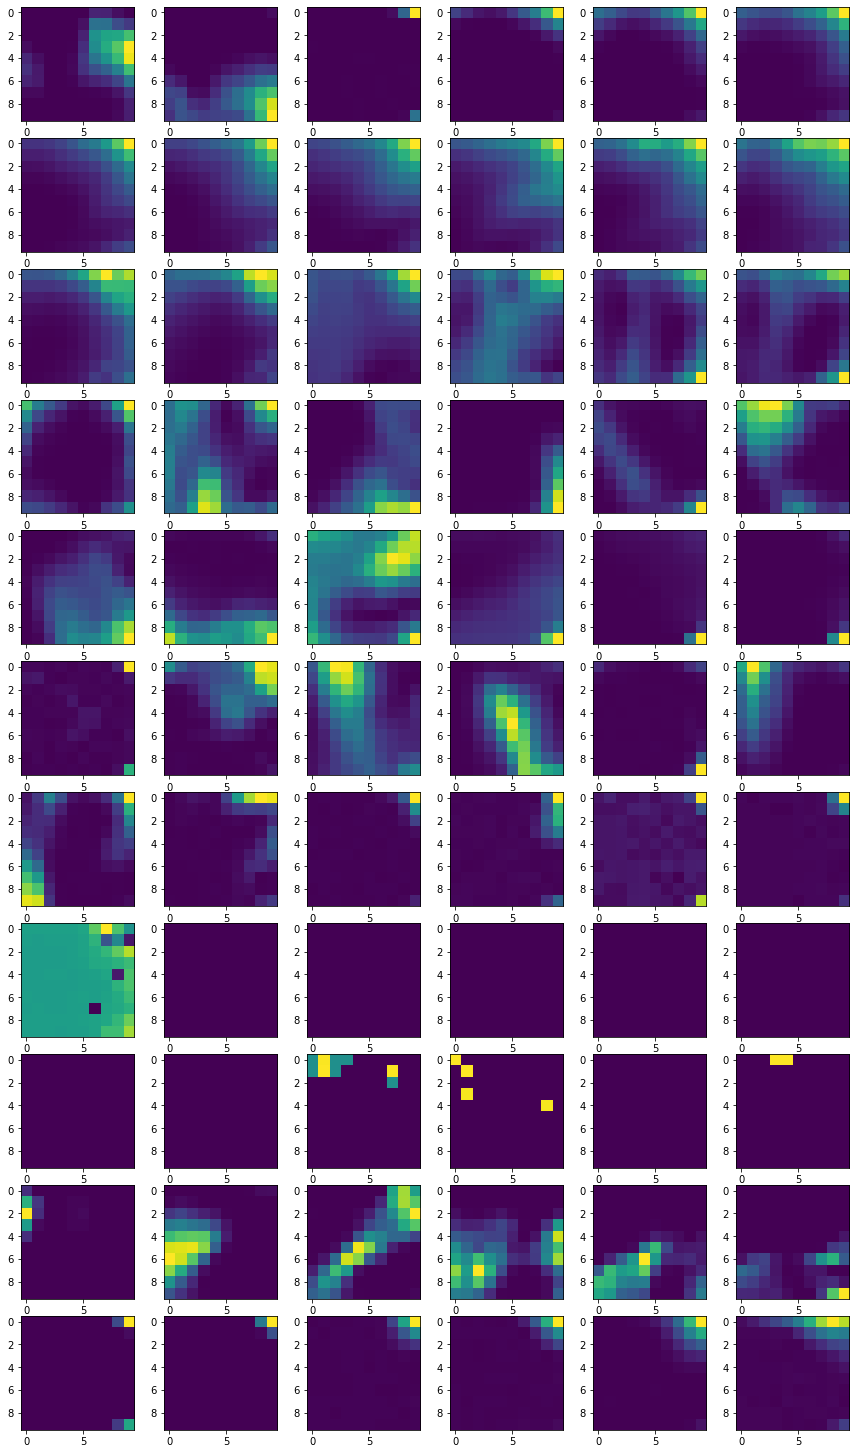

In [73]:
f,axes = plt.subplots(11,6,figsize=(12,20))
for i,ax in enumerate(axes.ravel()):
    im = ax.imshow(precipitation[25][i].reshape(10,10))
    # plt.colorbar(im)
plt.tight_layout(h_pad=0,pad=0)
plt.show()

In [61]:
precipitation_dict['201511'].shape,NWP_dict['201511'].shape


((120, 66, 100), (120, 67, 100))